In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Stacking layers

        
<img src="./Figs/10.jpg" alt="Drawing" style="width: 500px;"/>

### Feature extraction layer
- Try to extract multiple features
<img src="./Figs/11.jpg" alt="Drawing" style="width: 500px;"/>

### Flatten layer
- Unroll the features into 1D
<img src="./Figs/12.jpg" alt="Drawing" style="width: 500px;"/>

### Fully connected layer
- Connect 1D to the labels
- Can stack multiple Fully connected layers
- Handle the classification tasks
<img src="./Figs/13.jpg" alt="Drawing" style="width: 500px;"/>

### All together
<img src="./Figs/14.jpg" alt="Drawing" style="width: 500px;"/>

<img src="./Figs/15.jpg" alt="Drawing" style="width: 500px;"/>


## MNIST dataset

In [2]:
from keras.datasets import mnist

# Download dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

Using TensorFlow backend.


11501568/11490434 [==============================] - 26s 2us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


5


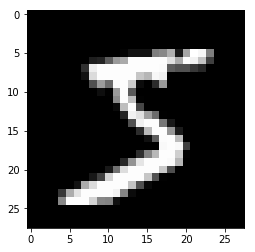

In [4]:
plt.imshow(X_train[0], cmap='gray');
print(y_train[0])

0


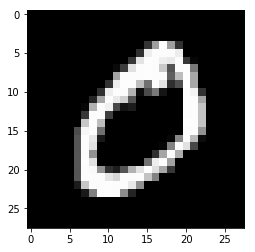

In [5]:
plt.imshow(X_train[1], cmap='gray');
print(y_train[1])

## Convert X to tensors

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## One hot encoding y

In [7]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train.shape)
print(y_train_cat.shape)

(60000,)
(60000, 10)


## Train

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation
import keras.backend as K

K.clear_session()

model = Sequential()

# Feature Extraction layers
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(
    X_train, y_train_cat,
    batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 24s 565us/step - loss: 10.9010 - acc: 0.3215 - val_loss: 10.0316 - val_acc: 0.3767
Epoch 2/2
42000/42000 [==============================] - 21s 494us/step - loss: 9.0566 - acc: 0.4360 - val_loss: 8.4452 - val_acc: 0.4742


In [10]:
result = model.evaluate(X_test, y_test_cat)
result

10000/10000 [==============================] - 4s 359us/step


[8.510326502990722, 0.47070000000000001]

In [11]:
print('Accuracy: ' + str(result[1]*100.0) + ' %')

Accuracy: 47.07 %
